## Import/Parse Data into df

In [11]:
pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 9.1 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import elementpath
import xml.etree.ElementTree as ET

In [13]:
#all speeches have the same structure with two children tags: meta(date, Url, description, introduction)
#open multiple files
from os import listdir, path
import os

In [14]:
#data 2012
mypath = 'data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012'
def merge_append_xml_files():
    data_frames = list[pd.DataFrame]()
    for root, dirs, files in os.walk(mypath):
        for file in files:
            if file.endswith('.xml'):
                df = pd.read_xml(os.path.join(root, file), xpath= ".//*")
                data_frames.append(df)
    return pd.concat(data_frames,axis = 0, ignore_index=True)

In [15]:
speech_2012 = merge_append_xml_files()
speech_2012.head(10)

,date,URL,description,introduction,p,id,speaker
0,2012-05-09,http://kremlin.ru/events/president/news/15271,Владимир Путин присутствовал на военном параде...,Владимир Путин присутствовал на военном параде...,None,NaN,None
1,2012-05-09,None,None,None,None,NaN,None
2,None,http://kremlin.ru/events/president/news/15271,None,None,None,NaN,None
3,None,None,Владимир Путин присутствовал на военном параде...,None,None,NaN,None
4,None,None,None,Владимир Путин присутствовал на военном параде...,None,NaN,None
5,None,None,None,None,Слава народу-победителю! С праздником вас! С Д...,NaN,None
6,None,None,None,None,Уважаемые граждане России!,1.0,В.Путин
7,None,None,None,None,Дорогие ветераны!,2.0,В.Путин
8,None,None,None,None,"Товарищи солдаты и матросы, сержанты и старшин...",3.0,В.Путин
9,None,None,None,None,"Товарищи офицеры, генералы и адмиралы!",4.0,В.Путин


In [16]:

def read_speech_xml(path):
    meta = pd.read_xml(path, xpath=".//meta")
    speech = pd.read_xml(path, xpath=".//speech/p")
    res = pd.concat([meta, speech], axis=1)
    res = res.assign(
        date = lambda x: x.date.fillna(method='ffill'),
        URL = lambda x: x.URL.fillna(method='ffill'),
        description = lambda x: x.description.fillna(method='ffill'),
        introduction = lambda x: x.introduction.fillna(method='ffill'))
    return res

In [17]:
import glob

# l = list(sorted(glob.glob('data/levshina-Putin_Corpus-e2dd797/Speeches_XML/**/*.xml')))
l = list(sorted(glob.glob('data/levshina-Putin_Corpus-e2dd797/Speeches_XML/**/*.xml')))
len(l)

871

In [18]:
results = {}
for file in l:
    print(file)
    results[file] = read_speech_xml(file)

data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15224.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15260.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15271.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15272.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15401.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15402.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15424.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15445.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15509.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15528.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15628.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15629.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15642.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15657.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15709.xml
data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15

print(results.keys())

In [19]:
results["data/levshina-Putin_Corpus-e2dd797/Speeches_XML/2012/15272.xml"]

,date,URL,description,introduction,id,speaker,p
0,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,1,В.Путин,"Дорогие наши ветераны! Уважаемые коллеги, друзья!"
1,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,2,В.Путин,Сегодня все мы испытываем одинаковые чувства.
2,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,3,В.Путин,"Нас переполняет гордость за свою страну, разгр..."
3,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,4,В.Путин,И мы скорбим о миллионах погибших в той беспощ...
4,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,5,В.Путин,"Мы всегда будем помнить, какой ценой завоёвана..."
5,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,6,В.Путин,"Сейчас везде, в России, в странах Содружества,..."
6,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,7,В.Путин,Такой этот день – День Победы! Самый правдивый...
7,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,8,В.Путин,"9 Мая – это, уважаемые ветераны, прежде всего ..."
8,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,9,В.Путин,"Позвольте ещё раз сердечно поздравить вас, отд..."
9,2012-05-09,http://kremlin.ru/events/president/news/15272,В Кремле состоялся торжественный приём в ознам...,В Кремле состоялся торжественный приём в ознам...,10,В.Путин,Ваша судьба – пример для всех поколений нашей ...


In [20]:
df = pd.concat(results)

In [21]:
df


date  \
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 0   2012-05-07   
                                                   1   2012-05-07   
                                                   2   2012-05-07   
                                                   3   2012-05-07   
                                                   4   2012-05-07   
...                                                           ...   
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 15  2022-08-16   
                                                   16  2022-08-16   
                                                   17  2022-08-16   
                                                   18  2022-08-16   
                                                   19  2022-08-16   

                                                                                                 URL  \
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 0   http://kremlin.ru/events/president/news/15224   
                                                   1   http://kremlin.ru/events/president/news/15224   
                                                   2   http://kremlin.ru/events/president/news/15224   
                                                   3   http://kremlin.ru/events/president/news/15224   
                                                   4   http://kremlin.ru/events/president/news/15224   
...                                                                                              ...   
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 15  http://kremlin.ru/events/president/news/69166   
                                                   16  http://kremlin.ru/events/president/news/69166   
                                                   17  http://kremlin.ru/events/president/news/69166   
                                                   18  http://kremlin.ru/events/president/news/69166   
                                                   19  http://kremlin.ru/events/president/news/69166   

                                                                                             description  \
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 0   В Большом Кремлёвском дворце состоялась торжес...   
                                                   1   В Большом Кремлёвском дворце состоялась торжес...   
                                                   2   В Большом Кремлёвском дворце состоялась торжес...   
                                                   3   В Большом Кремлёвском дворце состоялась торжес...   
                                                   4   В Большом Кремлёвском дворце состоялась торжес...   
...                                                                                                  ...   
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 15                                                NaN   
                                                   16                                                NaN   
                                                   17                                                NaN   
                                                   18                                                NaN   
                                                   19                                                NaN   

                                                                                            introduction  \
data/levshina-Putin_Corpus-e2dd797/Speeches_XML... 0   В Большом Кремлёвском дворце состоялась торжес...   
                                                   1   В Большом Кремлёвском дворце состоялась торжес...   
                                                   2   В Большом Кремлёвском дворце состоялась торжес...   
                                                   3   В Большом Кремлёвском дворце состоялась торжес...   
                                                   4   В Большом Кремлёвском дворце состоялась торжес...   
...                                   

In [22]:
df.to_excel('data/putin_corpus.xlsx', index=False)

In [23]:
putin = pd.read_excel('data/putin_corpus.xlsx')

In [24]:
putin

,date,URL,description,introduction,id,speaker,p
0,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,1,Д.Медведев,Уважаемые граждане России! Дорогие друзья!
1,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,2,Д.Медведев,Вступление избранного Президента в должность –...
2,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,3,Д.Медведев,Последовательность государственного курса – эт...
3,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,4,Д.Медведев,Именно эти задачи были приоритетными для меня ...
4,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,5,Д.Медведев,Нам многое удалось – даже в непростой период г...
...,...,...,...,...,...,...,...
33184,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,16,В.Путин,"Как и прежде, Россия будет активно, инициативн..."
33185,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,17,В.Путин,Мы должны восстановить уважение к международно...
33186,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,18,В.Путин,В завершение хочу сказать спасибо организатора...
33187,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,19,В.Путин,"Уверен, что форум будет и впредь вносить весом..."


## EDA

In [25]:
putin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33189 entries, 0 to 33188
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          33189 non-null  object
 1   URL           33189 non-null  object
 2   description   28629 non-null  object
 3   introduction  21863 non-null  object
 4   id            33189 non-null  int64 
 5   speaker       33189 non-null  object
 6   p             33189 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [26]:
putin[putin.isnull().any(axis=1)]

,date,URL,description,introduction,id,speaker,p
127,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,1,В.Путин,"Ваше Святейшество, хочу Вас поздравить и с эти..."
128,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,2,В.Путин,Большое Вам спасибо
129,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,3,Кирилл,Благодарю Вас.
130,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,4,Кирилл,"Действительно, этот праздник празднуется в бол..."
131,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,5,Кирилл,Очень большая программа различных мероприятий:...
...,...,...,...,...,...,...,...
33184,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,16,В.Путин,"Как и прежде, Россия будет активно, инициативн..."
33185,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,17,В.Путин,Мы должны восстановить уважение к международно...
33186,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,18,В.Путин,В завершение хочу сказать спасибо организатора...
33187,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,19,В.Путин,"Уверен, что форум будет и впредь вносить весом..."


In [27]:
#1687 rows where description is null and introduction has text
putin[putin.description.isnull() & putin.introduction.notnull()]

,date,URL,description,introduction,id,speaker,p
127,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,1,В.Путин,"Ваше Святейшество, хочу Вас поздравить и с эти..."
128,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,2,В.Путин,Большое Вам спасибо
129,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,3,Кирилл,Благодарю Вас.
130,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,4,Кирилл,"Действительно, этот праздник празднуется в бол..."
131,2012-05-24,http://kremlin.ru/events/president/news/15424,NaN,Владимир Путин поздравил Патриарха Кирилла с Д...,5,Кирилл,Очень большая программа различных мероприятий:...
...,...,...,...,...,...,...,...
25552,2020-03-17,http://kremlin.ru/events/president/news/62998,NaN,Владимир Путин принял участие в расширенном за...,116,В.Путин,"Это с одной стороны, а с другой – продолжить р..."
25553,2020-03-17,http://kremlin.ru/events/president/news/62998,NaN,Владимир Путин принял участие в расширенном за...,117,В.Путин,"Всё изложено правильно, верно. Хочу вам пожела..."
25701,2020-05-09,http://kremlin.ru/events/president/news/63334,NaN,Общероссийская акция «Бессмертный полк» провод...,1,В.Путин,Дорогие друзья!
25702,2020-05-09,http://kremlin.ru/events/president/news/63334,NaN,Общероссийская акция «Бессмертный полк» провод...,2,В.Путин,"Хочу обратиться сейчас к тем, кто регулярно по..."


In [28]:
#fillna of col description with text of introduction
putin['description'] = putin['description'].fillna(putin['introduction'])

In [29]:
#8453 rows where description has text and introduction is null
putin[putin.description.notnull() & putin.introduction.isnull()]

,date,URL,description,introduction,id,speaker,p
677,2012-08-28,http://kremlin.ru/events/president/news/16311,В Татарстане Владимир Путин посетил древний го...,NaN,1,В.Путин,"Добрый день, дорогие друзья!"
678,2012-08-28,http://kremlin.ru/events/president/news/16311,В Татарстане Владимир Путин посетил древний го...,NaN,2,В.Путин,"Мы собрались сегодня в древнем Болгаре, в почи..."
679,2012-08-28,http://kremlin.ru/events/president/news/16311,В Татарстане Владимир Путин посетил древний го...,NaN,3,В.Путин,Именно здесь более тысячи лет назад предки сов...
680,2012-08-28,http://kremlin.ru/events/president/news/16311,В Татарстане Владимир Путин посетил древний го...,NaN,4,В.Путин,"Здесь, в Поволжье, эти единые ценности помогал..."
681,2012-08-28,http://kremlin.ru/events/president/news/16311,В Татарстане Владимир Путин посетил древний го...,NaN,5,В.Путин,Именно так понимал своё высокое служение и Вал...
...,...,...,...,...,...,...,...
33156,2022-08-09,http://kremlin.ru/events/president/news/69134,Президент обратился к участникам и гостям конц...,NaN,6,В.Путин,Её музыкальные темы пронзительно рассказывали ...
33157,2022-08-09,http://kremlin.ru/events/president/news/69134,Президент обратился к участникам и гостям конц...,NaN,7,В.Путин,"Сегодня, спустя многие десятилетия Ленинградск..."
33158,2022-08-09,http://kremlin.ru/events/president/news/69134,Президент обратился к участникам и гостям конц...,NaN,8,В.Путин,"И это свидетельство настоящего, большого искус..."
33159,2022-08-09,http://kremlin.ru/events/president/news/69134,Президент обратился к участникам и гостям конц...,NaN,9,В.Путин,"Дорогие друзья, желаю успехов и счастья."


In [30]:
#fill introduction na with description text
putin['introduction'] = putin['introduction'].fillna(putin['description'])

In [31]:
# 2873 rows missing both description and introduction
putin[putin.description.isnull() & putin.introduction.isnull()]

,date,URL,description,introduction,id,speaker,p
172,2012-05-30,http://kremlin.ru/events/president/news/15509,NaN,NaN,1,В.Путин,"Уважаемые товарищи, коллеги, дорогие друзья!"
173,2012-05-30,http://kremlin.ru/events/president/news/15509,NaN,NaN,2,В.Путин,Позвольте мне сердечно поздравить вас с 20-лет...
174,2012-05-30,http://kremlin.ru/events/president/news/15509,NaN,NaN,3,В.Путин,"Прежде всего хочу поблагодарить всех, кто внёс..."
175,2012-05-30,http://kremlin.ru/events/president/news/15509,NaN,NaN,4,В.Путин,Особо отмечу компетентное участие Совета Безоп...
176,2012-05-30,http://kremlin.ru/events/president/news/15509,NaN,NaN,5,В.Путин,Ключевым направлением деятельности Совета Безо...
...,...,...,...,...,...,...,...
33184,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,16,В.Путин,"Как и прежде, Россия будет активно, инициативн..."
33185,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,17,В.Путин,Мы должны восстановить уважение к международно...
33186,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,18,В.Путин,В завершение хочу сказать спасибо организатора...
33187,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,19,В.Путин,"Уверен, что форум будет и впредь вносить весом..."


In [32]:
#OVERWRITE the putin file
putin.to_excel('data/putin_corpus.xlsx', index=False)

In [33]:
putin = pd.read_excel('data/putin_corpus.xlsx')
putin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33189 entries, 0 to 33188
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          33189 non-null  object
 1   URL           33189 non-null  object
 2   description   30316 non-null  object
 3   introduction  30316 non-null  object
 4   id            33189 non-null  int64 
 5   speaker       33189 non-null  object
 6   p             33189 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


### Identify Noise with Regex

In [35]:
import numpy as np
import pandas as pd

In [36]:
# no filtered speaker
kremlin = pd.read_excel('data/putin_corpus.xlsx')
kremlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33189 entries, 0 to 33188
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          33189 non-null  object
 1   URL           33189 non-null  object
 2   description   30316 non-null  object
 3   introduction  30316 non-null  object
 4   id            33189 non-null  int64 
 5   speaker       33189 non-null  object
 6   p             33189 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [38]:
kremlin.rename(columns = {'p':'text'}, inplace = True)

In [39]:
#Identify Noise with Regular Expression
import re 
RE_SUSPICIOUS = re.compile(r'[Äô&#<>{}\[\]\\]')

def impurity(text, min_len=10): 
    """returns the share of suspicious characters in a text""" 
    if text == None or len(text) < min_len: 
        return 0 
    else: 
        return len(RE_SUSPICIOUS.findall(text))/len(text)


In [40]:
# add new column to data frame
kremlin['impurity'] = kremlin['text'].apply(impurity, min_len=10)

In [41]:
kremlin['impurity'].sort_values().value_counts()

0.000000    32866
0.008511        4
0.009901        4
0.007143        3
0.008032        3
            ...  
0.005102        1
0.005128        1
0.005168        1
0.005208        1
0.052632        1
Name: impurity, Length: 254, dtype: int64

In [42]:
# get the top 3 records 
#critical part is just []...I will leave as it is for the moment
kremlin[['text', 'impurity']].sort_values(by='impurity', ascending=False).head(3)

,text,impurity
29375,Это гуманитарные в основном[предметы].,0.052632
7439,"Плюс ещё 200, будет суммарно 400 [мегаватт].",0.045455
14288,Уважаемая Валентина Ивановна [Матвиенко ]! Ува...,0.043011


### Remove Noise with Regex 

In [55]:
def clean(text):
     # everything non-alpahnumeric with a space
     text = re.sub(r'\W+',' ', text)
     # Two or more dots with one
     text = re.sub(r'\.{2,}', ' ', text)
     # sequences of white spaces
     text = re.sub(r'\s+', ' ', text)
     return text.strip()

In [56]:
kremlin['text'] = kremlin['text'].map(clean)

In [57]:
kremlin[['text', 'impurity']].sort_values(by='impurity',ascending=False).head(3)

KeyError: "['impurity'] not in index"

In [46]:
kremlin.drop(columns=['impurity'], inplace=True)

In [58]:
kremlin

,date,URL,description,introduction,id,speaker,text,tokens,lemma,pos
0,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,1,Д.Медведев,Уважаемые граждане России Дорогие друзья,"[уважаемые, граждане, россии, !, дорогие, друз...","[уважаемые, гражданин, россия, !, дорогой, дру...","[VERB, NOUN, PROPN, PUNCT, ADJ, NOUN, PUNCT]"
1,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,2,Д.Медведев,Вступление избранного Президента в должность э...,"[вступление, избранного, президента, в, должно...","[вступление, избрать, президент, должность, –,...","[NOUN, VERB, PROPN, ADP, NOUN, PUNCT, PART, AD..."
2,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,3,Д.Медведев,Последовательность государственного курса это ...,"[последовательность, государственного, курса, ...","[последовательность, государственный, курс, –,...","[NOUN, ADJ, NOUN, PUNCT, PART, ADJ, NOUN, ADP,..."
3,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,4,Д.Медведев,Именно эти задачи были приоритетными для меня ...,"[именно, эти, задачи, были, приоритетными, для...","[задача, приоритетный, пост, президент, ., раб...","[PART, DET, NOUN, AUX, ADJ, ADP, PRON, ADP, NO..."
4,2012-05-07,http://kremlin.ru/events/president/news/15224,В Большом Кремлёвском дворце состоялась торжес...,В Большом Кремлёвском дворце состоялась торжес...,5,Д.Медведев,Нам многое удалось даже в непростой период гло...,"[нам, многое, удалось, –, даже, в, непростой, ...","[удаться, –, непростой, период, глобальный, кр...","[PRON, NOUN, VERB, PUNCT, PART, ADP, ADJ, NOUN..."
...,...,...,...,...,...,...,...,...,...,...
33184,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,16,В.Путин,Как и прежде Россия будет активно инициативно ...,"[как, и, прежде, ,, россия, будет, активно, ,,...","[,, россия, активно, ,, инициативно, участвова...","[SCONJ, PART, ADV, PUNCT, PROPN, AUX, ADV, PUN..."
33185,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,17,В.Путин,Мы должны восстановить уважение к международно...,"[мы, должны, восстановить, уважение, к, междун...","[восстановить, уважение, международный, право,...","[PRON, ADJ, VERB, NOUN, ADP, ADJ, NOUN, PUNCT,..."
33186,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,18,В.Путин,В завершение хочу сказать спасибо организатора...,"[в, завершение, хочу, сказать, спасибо, органи...","[завершение, сказать, спасибо, организатор, ко...","[ADP, NOUN, VERB, VERB, NOUN, NOUN, NOUN, ADP,..."
33187,2022-08-16,http://kremlin.ru/events/president/news/69166,NaN,NaN,19,В.Путин,Уверен что форум будет и впредь вносить весомы...,"[уверен, ,, что, форум, будет, и, впредь, внос...","[уверенный, ,, форум, впредь, вносить, весомый...","[ADJ, PUNCT, SCONJ, NOUN, AUX, PART, ADV, VERB..."


## Text Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
# no filtered speaker
kremlin = pd.read_excel('data/putin_corpus.xlsx')
kremlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33189 entries, 0 to 33188
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          33189 non-null  object
 1   URL           33189 non-null  object
 2   description   30316 non-null  object
 3   introduction  30316 non-null  object
 4   id            33189 non-null  int64 
 5   speaker       33189 non-null  object
 6   p             33189 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [4]:
kremlin.rename(columns = {'p':'text'}, inplace = True)

In [5]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.ru.stop_words import STOP_WORDS

In [6]:
nlp_spacy = spacy.load('ru_core_news_sm', exclude=["ner"])
nlp_spacy.disable_pipe("parser")
nlp_spacy.enable_pipe("senter")

In [8]:
#Stopwords
from spacy.lang.ru import stop_words
nlp_spacy.Defaults.stop_words |= { 'дорогой', 'день', 'коллега', 'добрый', 'два', 'раз', 'сегодня', 'спасибо', 'уважаемый'}
stop_words = stop_words.STOP_WORDS

#### Token, POS, Lemma

In [83]:
tokens = []
lemma = []
pos = []

for doc in nlp_spacy.pipe(kremlin['text'].astype('unicode').values, batch_size=50):
    tokens.append([n.text.lower() for n in doc])
    lemma.append([n.lemma_.lower() for n in doc
                if n.lemma_.lower() not in stop_words])
    pos.append([n.pos_ for n in doc])

kremlin['tokens'] = tokens
kremlin['lemma'] = lemma
kremlin['pos'] = pos

In [ ]:
kremlin.to_excel('data/cleaned_putin_corpus.xlsx', index=False, engine='xlsxwriter')

## Topic Model

### LDA with Gensim

#### Model 1

num_topics= 10; compute bigrams, filter least and most common words

In [1]:
#Modules
import pandas as pd
import numpy as np
from ast import literal_eval
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.test.utils 
import tqdm
%matplotlib inline
import matplotlib.pyplot as plt


In [9]:
read_kremlin = pd.read_excel('data/cleaned_putin_corpus.xlsx')

In [10]:
list_of_docs = read_kremlin['lemma'].tolist()

In [11]:
#COMPUTE BIGRAMS
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(list_of_docs, min_count=10)
for idx in range(len(list_of_docs)):
    for token in bigram[list_of_docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            list_of_docs[idx].append(token)

In [12]:
def tolerant_literal_eval(target):
    try:
        return literal_eval(target)
    except:
        return [""]

In [13]:
list_of_docs2 = list(map(tolerant_literal_eval,list_of_docs))

[['уважаемые', 'гражданин', 'дорогой', 'друг'],
 ['вступление',
  'избрать',
  'президент',
  'должность',
  'начало',
  'новый',
  'этап',
  'жизнь',
  'история',
  'президент',
  'являться',
  'глава',
  'государство',
  'гарант',
  'конституция',
  'право',
  'свобода',
  'человек',
  'гражданин',
  'определять',
  'основный',
  'направление',
  'внутренний',
  'внешний',
  'политика'],
 ['курс',
  'необходимый',
  'условие',
  'движение',
  'вперёд',
  'важный',
  'масштабный',
  'преобразование',
  'проводить',
  'предыдущий',
  'год',
  'экономический',
  'социальный',
  'политический',
  'сфера',
  'получить',
  'дальнейший',
  'развитие',
  'построить',
  'сильный',
  'демократический',
  'государство',
  'торжествовать',
  'закон',
  'социальный',
  'справедливость',
  'обеспечить',
  'безопасность',
  'создать',
  'возможность',
  'самореализация',
  'человек',
  'гражданский',
  'творческий',
  'инициатива'],
 ['задача',
  'приоритетный',
  'пост',
  'президент',
  'работать

In [14]:
#CREATE A DICTIONARY
from gensim.corpora import Dictionary
#id2word
dictionary = Dictionary(list_of_docs2)
dictionary.num_docs

33189

In [15]:
# Filter out words that occur less than 10 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)
#Get number of stored tokens
print(len(dictionary))

8234


In [16]:
#CREATE A BOW CORPUS
#compute the frequency of each word
corpus = [dictionary.doc2bow(text) for text in list_of_docs2]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 8234
Number of documents: 33189


In [17]:
#useful for calculating the perplexity measures
# TD-IDF TRANSFORMATION
# multiplying a local component (term frequency) with a global component 
# (inverse document frequency), and normalizing the resulting documents to unit length.

from gensim.models import TfidfModel 
tfidf = TfidfModel(corpus) 
vectors = tfidf[corpus]

In [18]:
# TRAINING THE MODEL
from gensim.models import LdaModel 

# Set training parameters.
num_topics = 10
chunksize = 100
passes = 20 #controls how often we train the model on the entire corpus.
iterations = 200
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary

lda = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    per_word_topics=True, #calculates the topic weights for each word
    random_state=42)

In [19]:
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.035*"возможность" + 0.033*"большой" + 0.027*"помощь" + 0.026*"внимание" + '
  '0.025*"условие" + 0.022*"область" + 0.020*"огромный" + 0.020*"поддержка" + '
  '0.015*"город" + 0.014*"получить"'),
 (1,
  '0.076*"год" + 0.046*"новый" + 0.031*"работа" + 0.017*"медицинский" + '
  '0.016*"система" + 0.016*"тысяча" + 0.016*"центр" + 0.016*"хороший" + '
  '0.015*"современный" + 0.013*"успех"'),
 (2,
  '0.046*"развитие" + 0.030*"экономический" + 0.023*"проект" + 0.019*"мировой" '
  '+ 0.019*"интерес" + 0.018*"связь" + 0.015*"сотрудничество" + 0.015*"цель" + '
  '0.014*"рост" + 0.014*"ребёнок"'),
 (3,
  '0.040*"говорить" + 0.029*"вопрос" + 0.023*"число" + 0.021*"решение" + '
  '0.018*"задача" + 0.016*"проблема" + 0.016*"процент" + 0.014*"уровень" + '
  '0.013*"идти" + 0.012*"последний"'),
 (4,
  '0.039*"экономика" + 0.028*"отношение" + 0.024*"делать" + 0.021*"сила" + '
  '0.021*"больший" + 0.017*"видеть" + 0.016*"организация" + 0.016*"сторона" + '
  '0.014*"вместе" + 0.014*"компания"')

In [24]:
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#C_umass is based on document cooccurrence counts, 
# a one-preceding segmentation and a logarithmic conditional probability as confirmation measure


Coherence Score:  -4.223550414287029


In [25]:
#Measure perplexity
lda.log_perplexity(vectors)
#captures how surprised a model is of new data it has not seen before, 
# and is measured as the normalized log-likelihood of a held-out test set

-9.309626348165017

In [26]:
# coherence level of the individual topic
top_topics = lda.top_topics(vectors, topn=5)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / len(top_topics)
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -3.0081.


In [27]:
#save model in pickle format to working directory
lda.save("models/lda_model_1.pkl")
#load model back into your workspace from working directory
lda_1 = gensim.models.LdaModel.load("models/lda_model_1.pkl")

In [29]:
#import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis

#pyLDAvis.enable_notebook()
#vis = gensimvis.prepare(lda, corpus, dictionary)
#vis

#### Model 1 with another procedure

In [53]:
#Modules
import pandas as pd
import numpy as np
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.test.utils
import pyLDAvis
import pyLDAvis.gensim

import tqdm

NameError: name 'kremlin' is not defined

In [11]:
#let’s build phrase models that we can clean and 
# use to create the corpus for our analysis
# num of doc appearing min 5 times or more
bigram = gensim.models.Phrases(kremlin['text'], min_count = 5,
                               threshold = 100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [13]:
# remove the stopwords
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.ru.stop_words import STOP_WORDS

nlp_spacy = spacy.load('ru_core_news_sm', exclude=["ner"])
nlp_spacy.disable_pipe("parser")
nlp_spacy.enable_pipe("senter")

#Stopwords
from spacy.lang.ru import stop_words
nlp_spacy.Defaults.stop_words 
stop_words = stop_words.STOP_WORDS

In [14]:
#remove stopwords
def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc))
            if word not in stop_words]
            for doc in texts] # watch out this

In [15]:
# use bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [16]:
#Turn words into lemmas
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB',
                                          'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp_spacy(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
data_words_nostops = remove_stopwords(kremlin['text'])

In [18]:
data_words_bigram = make_bigrams(data_words_nostops)

In [19]:
data_lemma = lemmatization(data_words_bigram, 
                           allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [21]:
kremlin['lemma'] = data_lemma

In [25]:
kremlin.dtypes

date            object
URL             object
description     object
introduction    object
id               int64
speaker         object
text            object
lemma           object
dtype: object

In [33]:
### CREATE:
#1 dictionary
id2word = corpora.Dictionary(data_lemma)
# Filter out words that occur less than 10 documents, or more than 50% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.5)
#Get number of stored tokens
print(len(id2word))

#2 corpus
texts = data_lemma # no filtering most and least common words
#3 term matrix
corpus = [id2word.doc2bow(text) for text in texts]

5499


In [34]:
### TRAINING THE LDA MODEL
from gensim.models import LdaModel 

# Set training parameters.
num_topics = 10
chunksize = 100
passes = 20 #controls how often we train the model on the entire corpus.
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
id2word = id2word

lda = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto', #document-topic density. alpha influences how we draw topic distributions.
    eta='auto', #topic-word density
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    per_word_topics=True, #calculates the topic weights for each word
    minimum_probability = 0, #regardless of their probability threshold
    random_state=42)

In [35]:
### view the topics in LDA model
# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.079*"год" + 0.033*"российский" + 0.024*"работать" + 0.022*"знать" + '
  '0.018*"сделать" + 0.017*"помощь" + 0.016*"высокий" + 0.016*"внимание" + '
  '0.016*"центр" + 0.016*"процент"'),
 (1,
  '0.089*"первый" + 0.068*"друг" + 0.059*"президент" + 0.041*"дорогой" + '
  '0.039*"часть" + 0.038*"партнёр" + 0.035*"культура" + 0.035*"федерация" + '
  '0.022*"взгляд" + 0.015*"поддержать"'),
 (2,
  '0.058*"вопрос" + 0.049*"время" + 0.041*"решение" + 0.035*"регион" + '
  '0.032*"проблема" + 0.019*"принять" + 0.014*"специальный" + 0.013*"процесс" '
  '+ 0.013*"вид" + 0.013*"русский"'),
 (3,
  '0.058*"страна" + 0.035*"новый" + 0.027*"развитие" + 0.023*"работа" + '
  '0.021*"мир" + 0.018*"экономический" + 0.016*"возможность" + 0.015*"большой" '
  '+ 0.012*"народ" + 0.012*"хороший"'),
 (4,
  '0.061*"говорить" + 0.053*"сказать" + 0.035*"международный" + 0.028*"проект" '
  '+ 0.023*"мировой" + 0.020*"ситуация" + 0.020*"идти" + 0.019*"территория" + '
  '0.016*"рынок" + 0.013*"связать"'),
 (5,


In [36]:
# coherence level of the individual topic
top_topics = lda.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -4.1842.
[([(0.05838236, 'страна'),
   (0.034684304, 'новый'),
   (0.027036281, 'развитие'),
   (0.02291814, 'работа'),
   (0.020869333, 'мир'),
   (0.017962338, 'экономический'),
   (0.016008252, 'возможность'),
   (0.015215421, 'большой'),
   (0.012314196, 'народ'),
   (0.011609659, 'хороший'),
   (0.011094161, 'интерес'),
   (0.010796396, 'слово'),
   (0.01063292, 'больший'),
   (0.010088168, 'результат'),
   (0.009819352, 'думать'),
   (0.009565831, 'успех'),
   (0.0093840035, 'огромный'),
   (0.009367586, 'понимать'),
   (0.009352419, 'поддержка'),
   (0.00868974, 'цель')],
  -3.1230807126130435),
 ([(0.039696172, 'важный'),
   (0.02990521, 'государство'),
   (0.027208427, 'дело'),
   (0.023206064, 'отношение'),
   (0.022311153, 'безопасность'),
   (0.022116022, 'гражданин'),
   (0.01936054, 'право'),
   (0.017108187, 'связь'),
   (0.015733967, 'являться'),
   (0.014312098, 'сотрудничество'),
   (0.014250434, 'направление'),
   (0.013560499, 'главный'),
  

In [49]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -4.184244771787068


In [37]:
#save model in pickle format to working directory
lda.save("models/lda_model_1.pkl")
#load model back into your workspace from working directory
lda_1 = gensim.models.LdaModel.load("models/lda_model_1.pkl")

4547.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 12.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 7.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Preparing metadata (setup.py) ... done
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=8f68e6f1e97d908fc2d07b97eef97bbaab68bfaf00094b2d81e086141ebaacd3
  Stored in directory: /Users/adrianacuppuleri/Library/Caches/pip/wheels/1f/ef/46/1dc1c1e5d8ff2f3b44cccaf004cf64488cf82b5c359fbc8efb
  Created wheel for future: filename=future-0.18.2-py

#### Hyperparameter Tuning

1) Number of Topics (K)
2) Dirichlet hyperparameter alpha: Document-Topic Density
3) Dirichlet hyperparameter beta: Word-Topic Density

In [33]:
from gensim.models.ldamulticore import LdaMulticore

In [34]:
lda_para_model_n = []

In [35]:
for n in tqdm.tqdm(range(10,50)): 
    lda_model = LdaMulticore(corpus=corpus, 
                            id2word=dictionary, 
                            chunksize=100, 
                            eta='auto', 
                            iterations=400, 
                            num_topics=n, 
                            passes=20, 
                            eval_every=None, 
                            random_state=42,
                            workers= 3) 


lda_coherence = CoherenceModel(model=lda_model, corpus=corpus, 
                                dictionary=id2word, 
                                coherence='u_mass') 

lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

  0%|          | 0/40 [00:36<?, ?it/s]


KeyboardInterrupt: 

In [114]:
pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n").to_excel('models/lda_tuning_results.xlsx', index=False)

<AxesSubplot: xlabel='n'>

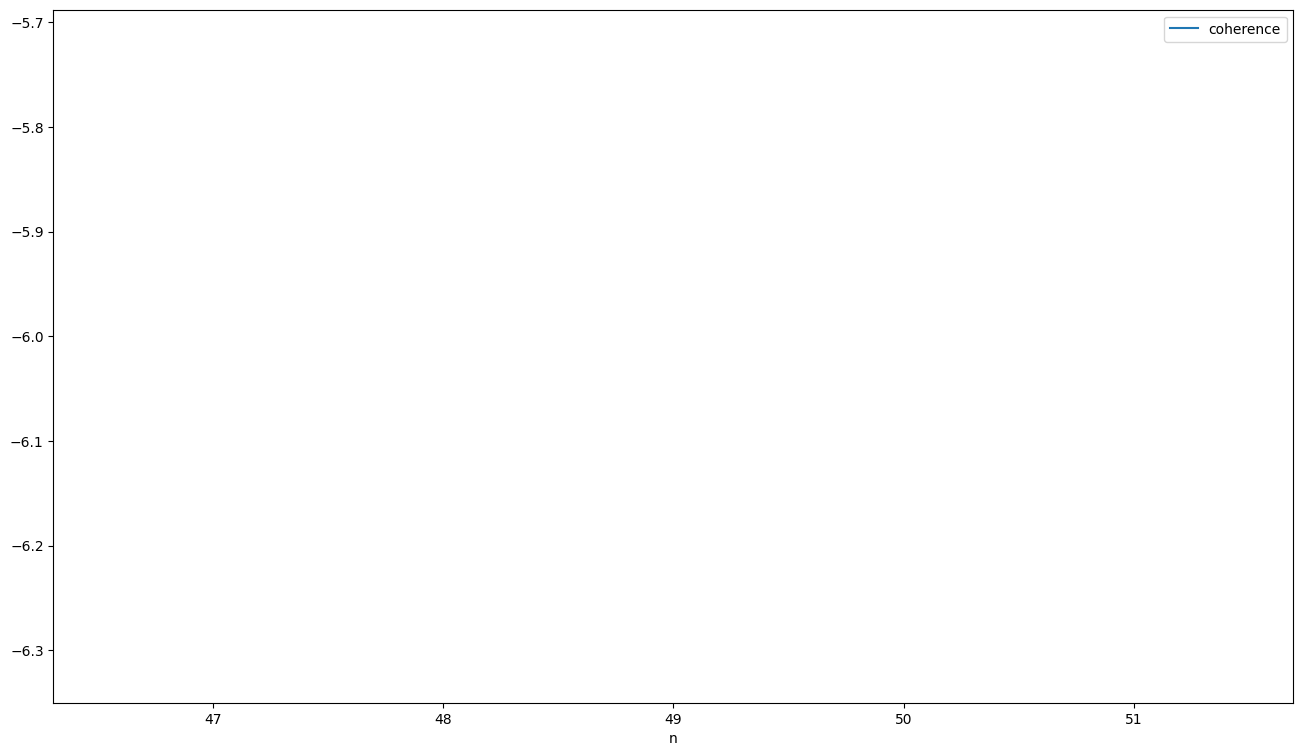

In [111]:
pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))